In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# нормалізація даних
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# архітектура нейромережі
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# компіляція моделі
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# навчання моделі
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    batch_size=64)

# оцінка точності моделі
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Точність спрощеної згорткової НМ: {test_acc:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 150ms/step - accuracy: 0.2654 - loss: 2.0277 - val_accuracy: 0.4340 - val_loss: 1.5947
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.4483 - loss: 1.5274 - val_accuracy: 0.4902 - val_loss: 1.4172
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 151ms/step - accuracy: 0.4986 - loss: 1.3977 - val_accuracy: 0.5241 - val_loss: 1.3297
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 160ms/step - accuracy: 0.5350 - loss: 1.3094 - val_accuracy: 0.5427 - val_loss: 1.2707
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 156ms/step - accuracy: 0.5598 - loss: 1.2556 - val_accuracy: 0.5700 - val_loss: 1.2218
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 152ms/step - accuracy: 0.5798 - loss: 1.2000 - val_accuracy: 0.5837 - val_loss: 1.1836
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 150ms/step - accuracy: 0.5945 - loss: 1.1533 - val_accuracy: 0.5958 - val_loss: 1.1432
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 148ms/step - accuracy: 0.6098 -

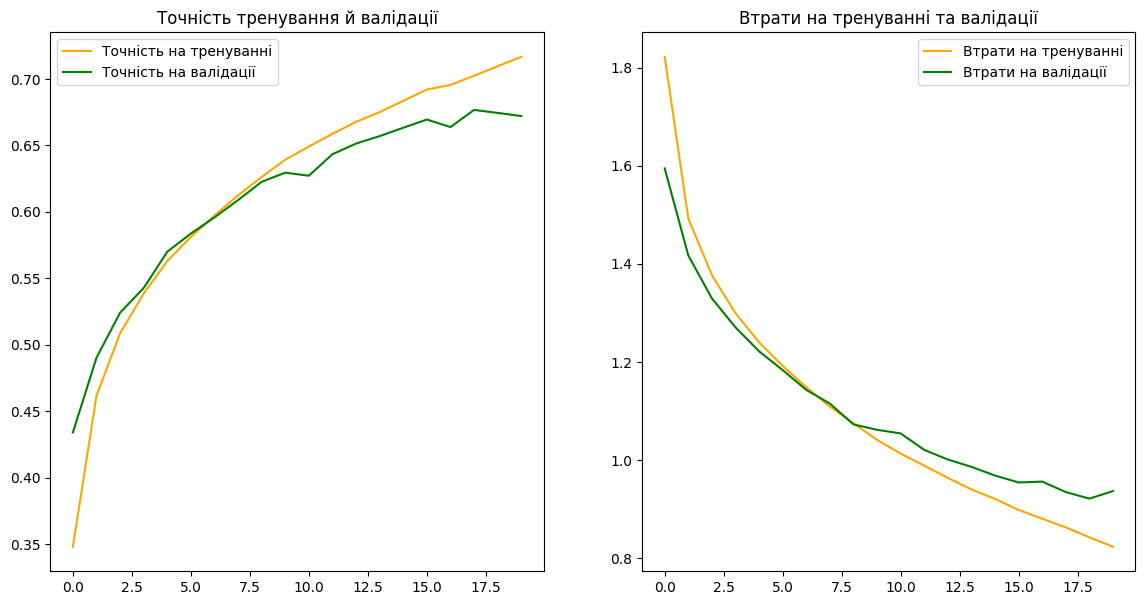

In [2]:
# import matplotlib.pyplot as plt

# # створення графіків точності та втрат
# def plot_accuracy_loss(history):
#     acc = history.history['accuracy']
#     val_acc = history.history['val_accuracy']
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']

#     epochs = range(len(acc))

#     plt.figure(figsize=(14, 5))

#     plt.subplot(1, 2, 1)
#     plt.plot(epochs, acc, 'b', label='Training accuracy')
#     plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
#     plt.title('Training and validation accuracy')
#     plt.legend()

#     plt.subplot(1, 2, 2)
#     plt.plot(epochs, loss, 'b', label='Training loss')
#     plt.plot(epochs, val_loss, 'r', label='Validation loss')
#     plt.title('Training and validation loss')
#     plt.legend()

#     plt.show()

# plot_accuracy_loss(history)


import matplotlib.pyplot as plt

# створення графіків точності й втрат
def plot_accuracy_loss(history, test_loss, test_acc):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(14, 7))

    # графік точності
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'orange', label='Точність на тренуванні')
    plt.plot(epochs, val_acc, 'green', label='Точність на валідації')
    plt.title('Точність тренування й валідації')
    plt.legend()

    # графік втрат
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'orange', label='Втрати на тренуванні')
    plt.plot(epochs, val_loss, 'green', label='Втрати на валідації')
    plt.title('Втрати на тренуванні та валідації')
    plt.legend()

    plt.show()

# відображення результатів
plot_accuracy_loss(history, test_loss, test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


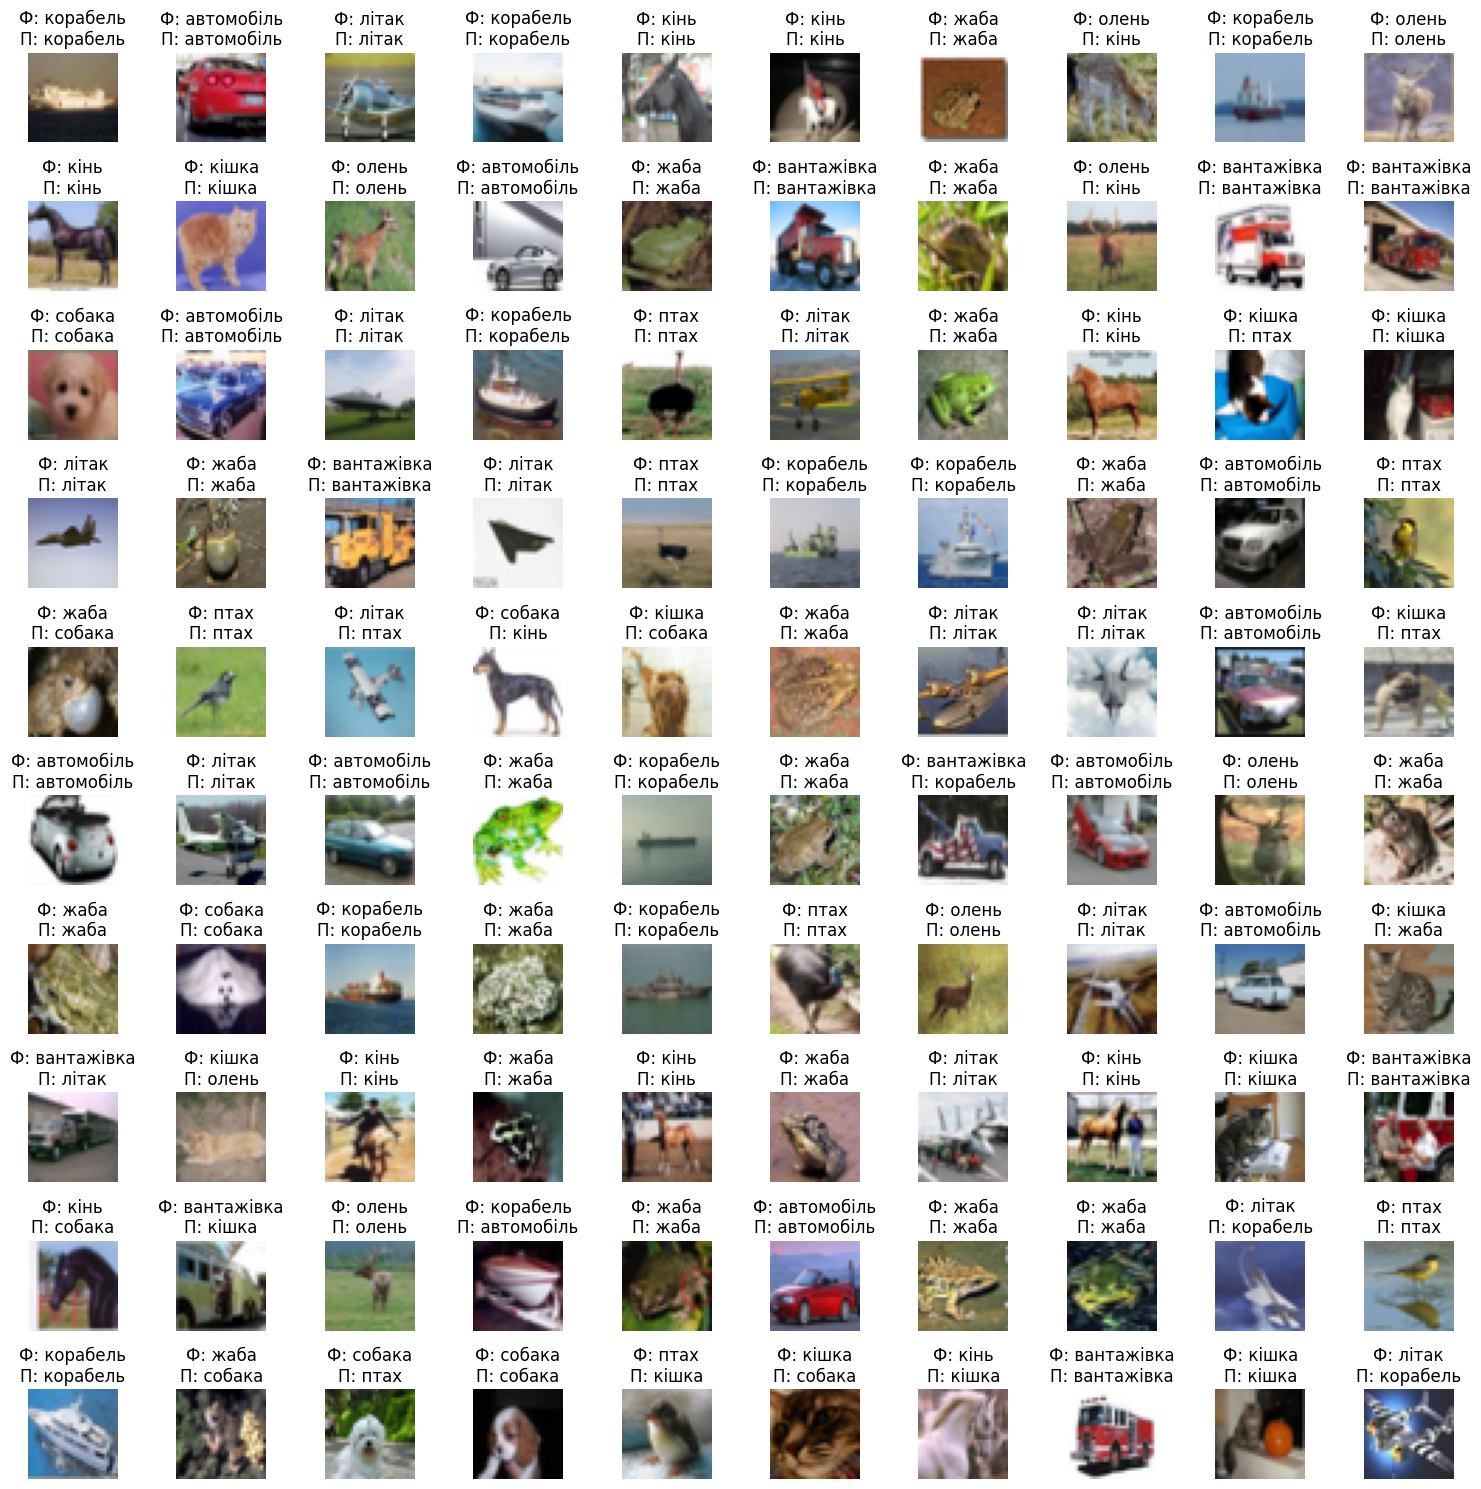

Точність на вибіркових зображеннях: 78.0 %


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# назв класів cifar10
class_labels = ['літак', 'автомобіль', 'птах', 'кішка', 'олень', 'собака', 'жаба', 'кінь', 'корабель', 'вантажівка']

# вибір 100 випадкових зображень із тестової вибірки у cifar10
indices = np.random.choice(len(x_test), 100, replace=False)
sample_images = x_test[indices]
sample_labels = np.argmax(y_test[indices], axis=1)

# Прогнозування міток для цих зображень за допомогою моделі
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Виведення зображень та передбачень
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
axes = axes.flatten()

for i, (image, true_label, predicted_label) in enumerate(zip(sample_images, sample_labels, predicted_labels)):
    axes[i].imshow(image)
    true_class = class_labels[true_label]
    predicted_class = class_labels[predicted_label]
    axes[i].set_title(f"Ф: {true_class}\nП: {predicted_class}") # П-прогнозування, Ф-фактичне на картинці
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# розрахунок точності прогнозу на отриманних  зображеннях
correct_predictions = np.sum(predicted_labels == sample_labels)
total_predictions = len(sample_labels)
accuracy_on_sample = correct_predictions / total_predictions

# виведення точності прогнозу на зразках
print(f"Точність на вибіркових зображеннях: {accuracy_on_sample * 100:.1f} %")



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
model.save('/content/drive/MyDrive/cnn_model1_r1.keras')


In [7]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/cnn_model1_r1.keras')


In [8]:
from google.colab import files
files.download('/content/drive/MyDrive/cnn_model1_r1.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Опрацювання зображення

Saving airplane1.jpg to airplane1.jpg
Saving airplane2.jpg to airplane2.jpg
Saving airplane3.jpg to airplane3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


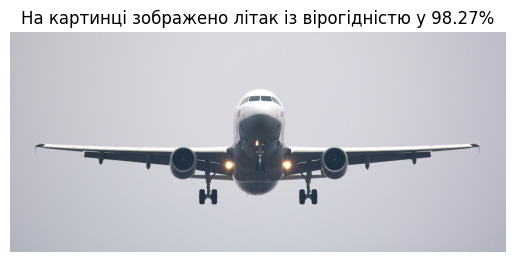

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


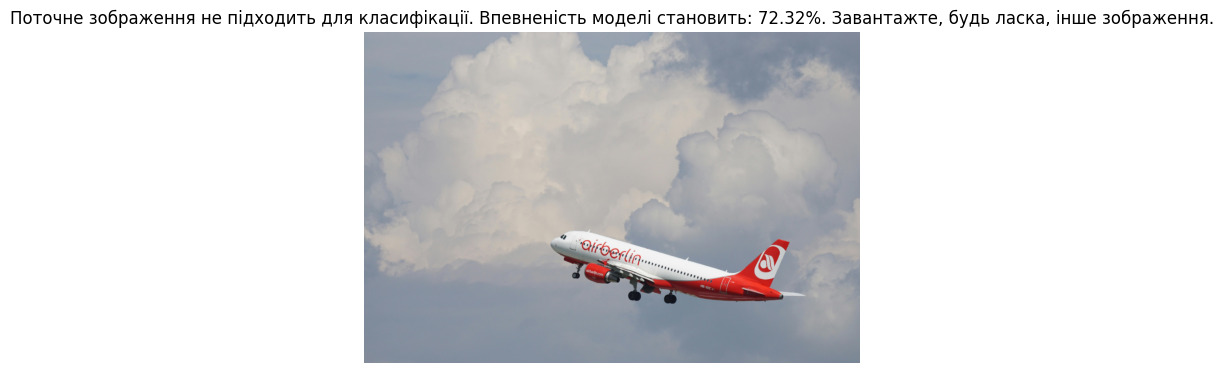

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


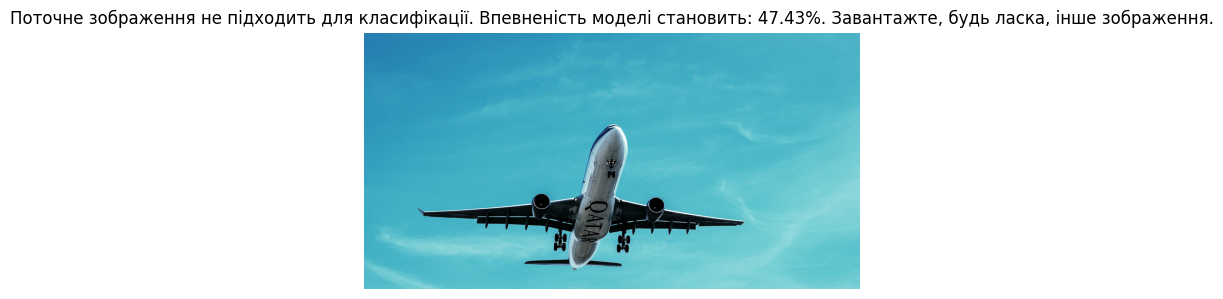

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


model = load_model('/content/drive/MyDrive/cnn_model1_r1.keras') # завантаження ШНМ, яка була створена

# функція попередньої обробки зображення
def preprocess_image(img):
    # конвертація до RGB, якщо потрібно (при чорно-білому форматі)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize((32, 32))  # Зміна розміру до 32x32
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  #вимір для партії
    return img_array

# межа точності (чи впевненості) моделі у роспізнавані отриманної картинки
confidence_threshold = 0.75

# завантаження зображення через Colab
uploaded = files.upload()

for filename in uploaded.keys():
    img = Image.open(filename)
    img_preprocessed = preprocess_image(img)
    prediction = model.predict(img_preprocessed)

    # отримання прогнозованого класу та впевненості
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]

    class_labels = ['літак', 'автомобіль', 'птах', 'кішка', 'олень', 'собака', 'жаба', 'кінь', 'корабель', 'вантажівка']

    # Перевірка на поріг точності картинки прогнозованної із точністю пороговою
    if confidence >= confidence_threshold:
        result_text = f'На картинці зображено {class_labels[predicted_class]} із вірогідністю у {confidence * 100:.2f}%'
    else:
        result_text = f"Поточне зображення не підходить для класифікації. Впевненість моделі становить: {confidence * 100:.2f}%. Завантажте, будь ласка, інше зображення."

    # Виведення результатів разом із зображенням
    plt.figure()
    plt.imshow(img)
    plt.title(result_text)
    plt.axis('off')
    plt.show()


